<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/flair_nlp_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings in Flair
Word embeddings are machine-interpretable representations of words 
such that embeddings of word pairs with similar _meanings_ will have
similar _embeddings_.

Flair offers a range of embeddings under the following categories:
* Classic
* Flair
* Stacked
* Document
* Other

It's important to understand what embeddings to use in what situation.

In [1]:
!pip install flair &> /dev/null

## Cosine similarity
This metric is often used to measure the similarity between two 
embedding vectors $A$ and $B$:
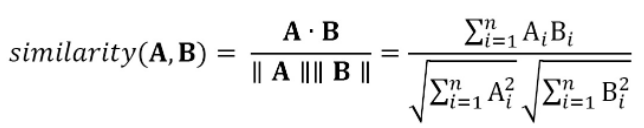

* Numerator: dot product of the two vectors
* Denominator: product of magnitudes of each vector

The result is a similarity score between -1 (exact opposite) and 
1 (similar). A score of 0 means that the vectors are orthogonal,
i.e. have no correlation.

We can use arithmetic operations on word vectors to form new words.
In theory, this means that if we add two word vectors together, we
should get a new word that is the sum of the meanings of both words.
Think of the `king – man ≈ queen – woman` analogy - both terms should yield a word embedding representing some kind of gender-neutral monarch. Note
that:
* Word embeddings are limited by their dimensionality, training 
biases and the completeness of the training data. 
* Whilst the idea makes sense in theory, often the newly computed embeddings 
is actually closest to one of the original words - so an exclusion criteria can be applied in practice to avoid this.

We implement an algorithm such that the analogy `A is to B as C is to D` holds.
1. Choose and instantiate a Flair embedding class.
2. Obtain embeddings for the words `A`, `B` and `C`.
3. Compute the approximate embedding `D ≈ B + C - A`
4. Obtain embeddings for all English words in Flair.
5. Find the closest matching word.

In [2]:
from flair.embeddings import WordEmbeddings

In [4]:
# Word embeddings trained over web crawl data
fasttext = WordEmbeddings("crawl")

2022-06-21 23:12:54,658 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmptw81qqvb


100%|██████████| 1200000128/1200000128 [00:46<00:00, 25618044.87B/s]

2022-06-21 23:13:41,890 copying /tmp/tmptw81qqvb to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2022-06-21 23:13:47,846 removing temp file /tmp/tmptw81qqvb
2022-06-21 23:13:48,615 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmprp3ab5ic


100%|██████████| 39323680/39323680 [00:02<00:00, 14543863.41B/s]

2022-06-21 23:13:51,684 copying /tmp/tmprp3ab5ic to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M


2022-06-21 23:13:51,797 removing temp file /tmp/tmprp3ab5ic


In [5]:
from flair.data import Sentence

def compute_embedding_for_D(A, B, C, embedding):

    wordsABC_sentence = Sentence(' '.join([A, B, C]))
    embedding.embed(wordsABC_sentence)    

    A_embedded = wordsABC_sentence[0].embedding
    B_embedded = wordsABC_sentence[1].embedding
    C_embedded = wordsABC_sentence[2].embedding   
    D_embedding = B_embedded + C_embedded - A_embedded

    return D_embedding.tolist()

Given our King is to man as queen is to woman analogy, the resulting embedding should be similar to the embedding of the word woman.

In [6]:
# Embed words by wrapping it in a `Sentence` object
D = compute_embedding_for_D('king', 'man', 'queen', fasttext)

print(D)

[0.13569998741149902, -0.3856000006198883, -0.1022999957203865, -0.13539999723434448, -0.01410001516342163, -0.04699999839067459, -0.10929998755455017, 0.01759999990463257, 0.01919996738433838, -0.04389999806880951, -0.09710001945495605, 0.3399999737739563, 0.18649999797344208, 0.22010000050067902, -0.32850000262260437, -0.031500011682510376, -0.15630000829696655, 0.2533000111579895, -0.1753000020980835, -0.22199997305870056, -0.09129999577999115, 0.03869999945163727, -0.2296999990940094, -0.382099986076355, 0.2353999763727188, -0.22460001707077026, -0.4235000014305115, -0.19739998877048492, -0.03290000557899475, -0.062199998646974564, 0.11219999194145203, -0.1899999976158142, -0.0601000040769577, -0.4790000319480896, -0.08500000834465027, -0.22340001165866852, 0.09390000998973846, -0.0032000020146369934, 0.22579999268054962, 0.04739999771118164, 0.14300000667572021, -0.042600005865097046, -0.10939997434616089, 0.1727999895811081, 0.5296000242233276, 0.029300004243850708, 0.10900001227

In [25]:
s = Sentence("king man queen woman")
e = fasttext.embed(s)

In [34]:
from flair import datasets
from flair.data import Sentence

def get_embedded_english_vocab(embedding):
    """
    Extract vocabulary from a large English corpus to get a 
    near-complete set of commonly used English words. Then 
    (non-contextually) embed words as part of a single sentence.
    UDT = Universal Dependency Treebank English dataset.
    """
    dataset = datasets.UD_ENGLISH()
    vocab_list = dataset.make_vocab_dictionary().get_items()
    vocab = Sentence(' '.join(vocab_list))
    embedding.embed(vocab)
    return vocab

In [36]:
get_embedded_english_vocab(fasttext)[6].embedding

2022-06-21 23:22:31,175 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-dev.conllu not found in cache, downloading to /tmp/tmpac3xi4gq


1738438B [00:00, 30369005.39B/s]         

2022-06-21 23:22:31,304 copying /tmp/tmpac3xi4gq to cache at /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:22:31,327 removing temp file /tmp/tmpac3xi4gq


2022-06-21 23:22:31,600 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-test.conllu not found in cache, downloading to /tmp/tmpbjrab_rm


1738935B [00:00, 48046626.39B/s]         

2022-06-21 23:22:31,699 copying /tmp/tmpbjrab_rm to cache at /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
2022-06-21 23:22:31,708 removing temp file /tmp/tmpbjrab_rm
2022-06-21 23:22:31,840 https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu not found in cache, downloading to /tmp/tmpn9_z79nf



13686411B [00:00, 75857844.14B/s]

2022-06-21 23:22:32,095 copying /tmp/tmpn9_z79nf to cache at /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu


2022-06-21 23:22:32,122 removing temp file /tmp/tmpn9_z79nf
2022-06-21 23:22:32,127 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:22:32,129 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:22:32,136 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:22:32,140 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu


tensor([-1.7500e-02, -2.1890e-01,  3.5300e-02,  3.4500e-02,  9.1300e-02,
         2.6900e-02, -1.6700e-01, -2.7590e-01,  4.2830e-01,  3.4900e-02,
         1.3200e-02,  1.0780e-01, -5.5800e-02, -2.1500e-02, -3.8900e-02,
         3.7900e-02, -1.1800e-01,  1.6400e-02,  6.3100e-02,  4.5900e-02,
         3.3100e-02, -1.7600e-02,  1.0000e-03,  1.7600e-02,  3.5100e-02,
        -5.4500e-02,  4.3000e-02, -3.0000e-02,  3.5800e-02,  2.5880e-01,
         5.7600e-02, -8.5400e-02,  6.3200e-02,  2.5500e-02,  8.0000e-04,
         1.5200e-02, -8.4300e-02, -2.4900e-02,  6.5100e-02, -9.6100e-02,
        -1.0700e-02,  1.6490e-01,  3.0000e-04, -2.8750e-01, -3.8800e-02,
        -2.1200e-02, -9.7300e-02,  3.0100e-02, -4.7400e-02,  9.1730e-01,
        -2.4000e-03,  4.4220e-01,  1.3670e-01, -1.7700e-02, -5.9100e-02,
        -6.9000e-03,  6.9200e-02, -3.9560e-01, -4.8600e-02,  2.5100e-02,
         1.3760e-01,  1.8160e-01, -1.6400e-02, -2.1030e-01,  1.5600e-02,
        -4.4900e-02, -1.0040e-01,  3.9900e-02, -8.4

In [38]:
# Need to find the closest matching word using a similarity measure as `D` 
# won't be an exact match with a word from our vocabulary. We use cosine 
# similarity for this.
from sklearn.metrics.pairwise import cosine_similarity as sim

def find_closest_matching_word(D, vocab, ABC):
    """
    Iterate through vocab object and compute the similarity 
    between the `D` embedding and each word in vocab. Then 
    select the closest matching word.
    """
    max_match = -1
    for word in vocab:
        match = sim([D], [word.embedding.tolist()])[0][0]
        if match > max_match and word.text not in ABC:
            max_match = match
            closest_matching_word = word.text
    return closest_matching_word

In [40]:
def A_is_to_B_as_C_is_to(A, B, C):
    """
    Helper function to call others and print solution. Note that the
    WordEmbeddings object is only instantiated once, improving performance.
    """
    fasttext = WordEmbeddings('crawl')
    result = compute_embedding_for_D(A, B, C, fasttext)
    vocab = get_embedded_english_vocab(fasttext)
    D = find_closest_matching_word(result, vocab, {A, B, C})
    print(f'{A} is to {B} as {C} is to {D}')

In [41]:
A_is_to_B_as_C_is_to("king", "man", "queen")

2022-06-21 23:28:26,104 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:28:26,107 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:28:26,112 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:28:26,116 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
king is to man as queen is to woman


In [42]:
A_is_to_B_as_C_is_to("do", "did", "go")

2022-06-21 23:29:08,051 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:29:08,056 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:29:08,058 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:29:08,060 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
do is to did as go is to went


In [43]:
A_is_to_B_as_C_is_to("bread", "baker", "meat") 

2022-06-21 23:29:52,251 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:29:52,255 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:29:52,259 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:29:52,267 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
bread is to baker as meat is to butcher


In [44]:
A_is_to_B_as_C_is_to("London", "England", "Ljubljana")

2022-06-21 23:30:30,965 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:30:30,968 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:30:30,971 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:30:30,974 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
London is to England as Ljubljana is to Slovenia


In [45]:
A_is_to_B_as_C_is_to("life", "death", "beginning")

2022-06-21 23:31:09,462 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:31:09,464 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:31:09,472 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:31:09,479 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
life is to death as beginning is to ending


In [46]:
A_is_to_B_as_C_is_to("big", "bigger", "small")

2022-06-21 23:31:51,490 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:31:51,495 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:31:51,497 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:31:51,501 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
big is to bigger as small is to smaller


In [47]:
A_is_to_B_as_C_is_to("man", "actor", "woman") 

2022-06-21 23:32:32,933 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:32:32,935 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:32:32,941 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:32:32,946 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
man is to actor as woman is to actress


In [49]:
A_is_to_B_as_C_is_to("ball", "football", "bat")

2022-06-21 23:33:35,666 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:33:35,669 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:33:35,675 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:33:35,678 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
ball is to football as bat is to baseball


In [50]:
A_is_to_B_as_C_is_to("fruit", "juice", "sugar")

2022-06-21 23:34:22,240 Reading data from /root/.flair/datasets/ud_english
2022-06-21 23:34:22,242 Train: /root/.flair/datasets/ud_english/en_ewt-ud-train.conllu
2022-06-21 23:34:22,251 Dev: /root/.flair/datasets/ud_english/en_ewt-ud-dev.conllu
2022-06-21 23:34:22,255 Test: /root/.flair/datasets/ud_english/en_ewt-ud-test.conllu
fruit is to juice as sugar is to soda


## Classic word embeddings
* Pre-trained
* Non-contextual - one word always maps to one precomputed embedding regardless of the context.
* Requires no pre-processing.

Note: When loading an embedding for the first time, Flair will download the embedding model and store it locally. It will use the locally stored version for any subsequent calls.

Supported embeddings include:
* GloVe
* Komninos
* Twitter
* Turian
* FastText over web crawls

In [51]:
from flair.data import Sentence
from flair.embeddings import WordEmbeddings

embedding = WordEmbeddings('crawl')
sentence = Sentence("one two three one")
embedding.embed(sentence)
for token in sentence:
    print(token.embedding)

assert sentence[0].embedding.tolist() == sentence[3].embedding.tolist()

tensor([-5.5200e-02, -5.3500e-02, -3.6800e-02, -2.8510e-01, -3.8100e-02,
        -4.8600e-02,  2.3830e-01, -1.2000e-01,  2.6200e-01, -5.7500e-02,
         2.2800e-02,  8.1900e-02,  5.0200e-02, -3.3300e-02, -9.0000e-03,
        -5.8900e-02,  2.6670e-01, -1.6800e-02, -1.1340e-01,  6.3300e-02,
        -6.6900e-02, -2.2100e-02, -4.8000e-02,  1.8300e-02, -7.7300e-02,
         3.2000e-03,  3.3000e-03,  4.3800e-02, -1.5840e-01, -2.2040e-01,
        -6.1500e-02, -1.5800e-02, -3.0180e-01, -1.5300e-02, -1.2000e-01,
         8.9000e-03, -2.8800e-02,  1.2850e-01, -1.7890e-01, -9.4700e-02,
        -3.7400e-02,  9.4400e-02, -3.1700e-02,  1.4600e-01,  1.0400e-01,
        -6.5500e-02, -3.3300e-02,  1.4050e-01,  2.0700e-02,  9.7500e-02,
        -1.6400e-02, -3.3670e-01,  2.2820e-01, -9.1100e-02,  2.4800e-02,
         2.8100e-02, -5.6300e-02, -2.0920e-01, -7.6900e-02, -8.5500e-02,
         1.4430e-01, -1.4790e-01, -1.3200e-02, -1.7510e-01,  3.4200e-02,
        -7.0000e-04,  2.7500e-02, -1.4100e-02,  7.1

## Flair embeddings
* Special type of contextual embeddings.
* Models words as a sequence of characters.
* Motivation for the `Contextual String Embeddings for Sequence Labeling` paper.
* Contextual embedding - each word embedding should not only be defined by its _syntactic_ meaning, but also the _context_ it appears in. Each word will have a _different_ embedding for every context it appears in.
* Each pre-trained Flair model offers a _forward_ version and a _backward_ version. 

In [54]:
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

embedding = FlairEmbeddings('news-forward')
s1 = Sentence("nice shirt")
s2 = Sentence("nice pants")
embedding.embed(s1)
embedding.embed(s2)
print(s1[0].embedding.tolist() == s2[0].embedding.tolist())

True


In [53]:
# Put some cnotext before "nice shirt".
s1 = Sentence("very nice shirt")
s2 = Sentence("pretty nice pants")

embedding.embed(s1)
embedding.embed(s2)

print(s1[1].embedding.tolist() == s2[1].embedding.tolist())

False


Character-level sequence modeling handles _out of vocabulary_ (OOV) words very well, cf. other techniques like GloVe. OOV support offers good performance for words that never appeared in the original training set as well as mistyped words.

In [60]:
from sklearn.metrics.pairwise import cosine_similarity as sim

s1 = Sentence("eating potato")
s2 = Sentence("eating potatoo")

embedding = FlairEmbeddings('news-forward')
embedding.embed(s1)
embedding.embed(s2)

e1 = s1[1].embedding.tolist()
e2 = s2[1].embedding.tolist()

print(sim([e1], [e2])) # Strong connection

[[0.86474945]]


## Pooled embeddings
`PooledFlairEmbeddings` generally give better performance than `FlairEmbeddings`, but require substantially more memory.
* `news-DIRECTION`: trained on a 1B+ word corpus, e.g. `news-forward`.
* `LANGUAGE_CODE-DIRECTION`: trained on Wikipedia, Opus or other large corpora.
* `pubmed-DIRECTION`: trained on biomedical PubMed abstract.
* `multi-DIRECTION`: multilingual embeddings supporting 300+ languages.

Complete and up-to-date list of supported embeddings can be found [here](https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md).

## Stacked embeddings
* Type of meta embeddings that allows us to form _new_ embeddings by _combining_ two or more embeddings together, _stacking_ them on top of each other, e.g. `forward` and `backward` versions of Flair embeddings. You can also mix _contextual_ and _classic_ word embeddings - this combination often yields state-of-the-art results.
* Use the `StackedEmbeddings` class and pass in a list of embedding objects.

In [61]:
from flair.embeddings import FlairEmbeddings, WordEmbeddings
from flair.embeddings import StackedEmbeddings

glove = WordEmbeddings('glove')
news_fw = FlairEmbeddings('news-forward')
news_bw = FlairEmbeddings('news-backward')
combined_embeddings_list = [glove, news_fw, news_bw]
stack = StackedEmbeddings(combined_embeddings_list)

2022-06-22 00:04:26,158 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpjkid5a8p


100%|██████████| 160000128/160000128 [00:06<00:00, 23300672.75B/s]

2022-06-22 00:04:33,430 copying /tmp/tmpjkid5a8p to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2022-06-22 00:04:34,012 removing temp file /tmp/tmpjkid5a8p
2022-06-22 00:04:34,412 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpcikxbrb1


100%|██████████| 21494764/21494764 [00:01<00:00, 12108476.46B/s]

2022-06-22 00:04:36,546 copying /tmp/tmpcikxbrb1 to cache at /root/.flair/embeddings/glove.gensim


2022-06-22 00:04:36,586 removing temp file /tmp/tmpcikxbrb1
2022-06-22 00:04:38,996 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmptrbt88xk


100%|██████████| 73034575/73034575 [00:03<00:00, 20542476.90B/s]

2022-06-22 00:04:42,947 copying /tmp/tmptrbt88xk to cache at /root/.flair/embeddings/news-backward-0.4.1.pt


2022-06-22 00:04:43,149 removing temp file /tmp/tmptrbt88xk


In [63]:
s = Sentence("We have now covered the main word embedding types in Flair.")
stack.embed(s)
s[0].embedding

tensor([-0.1779,  0.6267,  0.4787,  ..., -0.0007, -0.0041, -0.1082])

## Document embeddings
* One embedding for entire document instead of for each word. 
* Instead of accessing the embedding through `sentence[n].embedding`, returning the `n`-th word's embedding, simply run `sentence.embedding` or `sentence.get_embedding()`.

Supported embedding types include:
* `TransformerDocumentEmbeddings`: uses pre-trained Hugging Face transformers.
* `DocumentPoolEmbeddings`: meta document embedding class that takes a word embedding object, computes the embedding for each word, and returns the _mean_ of all word embeddings.
* `DocumentRNNEmbeddings`: meta document embedding class that takes a word embedding object, trains a RNN on the entire document, and returns the final state as the embedding for that document.
* `SentenceTransformerDocumentEmbeddings`: a document embedding class that uses the external `sentence-transformers` library.

In [64]:
# `TransformerDocumentEmbeddings` class is recommended for document 
# classification tasks.
from flair.data import Sentence
from flair.embeddings import TransformerDocumentEmbeddings

# Pass the `bert-base-uncased` embedding ID to the `TransformerDocumentEmbeddings`
# class.
embedding = TransformerDocumentEmbeddings('bert-base-uncased')
sentence = Sentence('Example sentence .')
embedding.embed(sentence)
print(sentence.embedding)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

tensor([-3.8265e-01, -4.1989e-01, -4.5568e-01, -1.3186e-01, -1.2537e-01,
        -2.0902e-01,  3.6137e-01,  6.7940e-01, -2.0756e-01,  8.2741e-02,
        -4.3637e-01,  6.3790e-03, -1.5674e-01,  5.8669e-03,  3.8537e-01,
         2.9506e-01,  1.2890e-01,  5.4639e-01,  2.0102e-01, -3.9490e-01,
         2.2782e-01, -2.4621e-01, -4.1011e-01, -3.6260e-01,  6.7014e-01,
        -4.5109e-01, -1.3158e-01, -4.9097e-01, -3.4307e-01,  1.0990e-01,
        -1.4936e-01,  1.2353e-01, -3.3298e-01, -9.2121e-02,  5.2665e-01,
        -4.1306e-01,  3.2726e-01,  1.1250e-01,  2.1552e-01, -1.6543e-01,
        -2.1626e-01, -2.6640e-01,  6.7084e-01, -4.2707e-02, -1.7106e-01,
        -1.3874e-01, -2.7392e+00, -3.8732e-01, -5.3229e-01, -1.8500e-01,
        -3.6312e-01,  1.8642e-02,  4.9888e-01,  5.2212e-01, -2.6090e-01,
         7.2174e-01, -1.1585e-01,  4.0245e-01,  2.6817e-01, -2.1080e-02,
         5.2385e-02, -1.3981e-02,  4.1279e-02,  6.7050e-02,  7.1763e-02,
         1.0290e-01, -2.4961e-01,  6.2544e-01, -9.1